In [9]:
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(readxl)
library(dplyr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recip

In [10]:
training_data <- read_csv("https://raw.githubusercontent.com/thisisyifulin/group_project-group34-/main/Training_Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv") |>
select(STG, SCG, STR, LPR, PEG, UNS)

testing_data <- read_csv("https://raw.githubusercontent.com/thisisyifulin/group_project-group34-/main/Test_Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv")

training_data
testing_data

New names:
• `` -> `...7`
• `` -> `...8`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (5): STG, SCG, STR, LPR, PEG
lgl (2): ...7, ...8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 145 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): UNS
dbl (5): STG, SCG, STR, LPR, PEG

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


In [11]:
#count the amount of each class of UNS
counts_class <- training_data |>
                group_by(UNS) |>
                summarize(count_class = n())
counts_class

UNS,count_class
<chr>,<int>
High,63
Low,83
Middle,88
very_low,24


In [14]:
#finds the mean of predictors

select_training_data <- training_data |>
select(STG, STR, LPR, PEG, UNS) # selecting the variables


predictor_means <- select_training_data |>
                   summarize(across(STG:PEG, mean, na.rm = TRUE))

predictor_means

#count the number of rows of that included na and renamed it into column count_ca
data_count_na <- summarize(select_training_data, count_na = sum(is.na(select_training_data)))
data_count_na

STG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.4680039,0.4327132,0.4585388


count_na
<int>
0


In [21]:
wider_counts_class <- counts_class |>
                pivot_wider(names_from = 
merge_data_inf <- 
        cbind(predictor_means, data_count_na)

merge_data_inf

STG,STR,LPR,PEG,count_na
<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.3711473,0.4680039,0.4327132,0.4585388,0


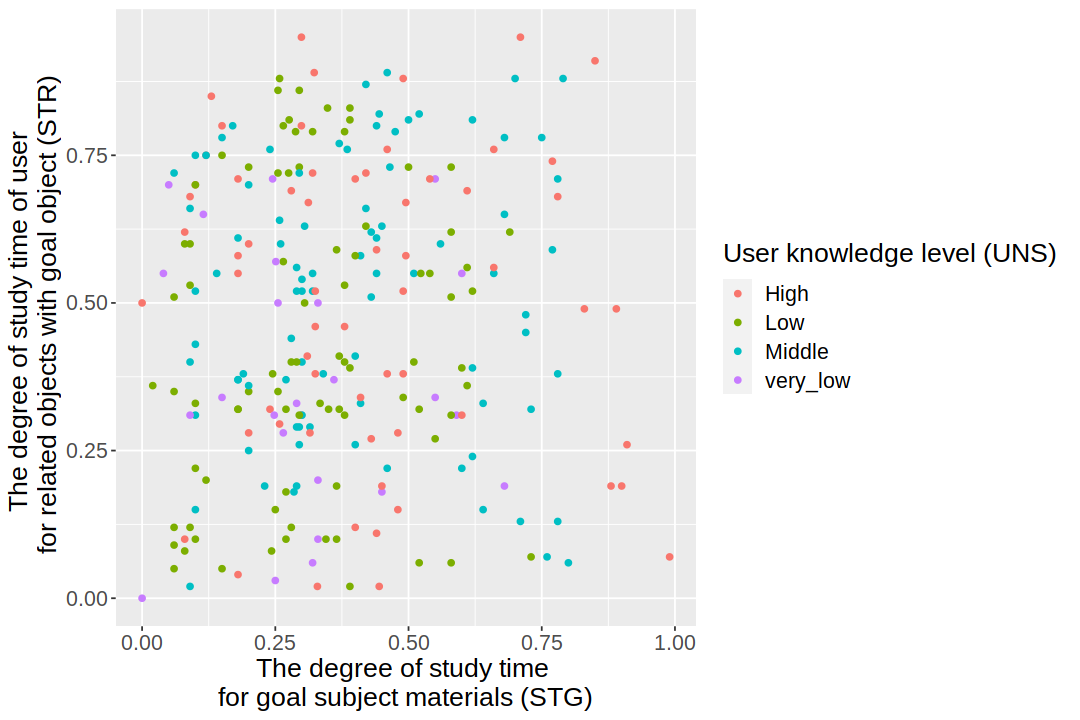

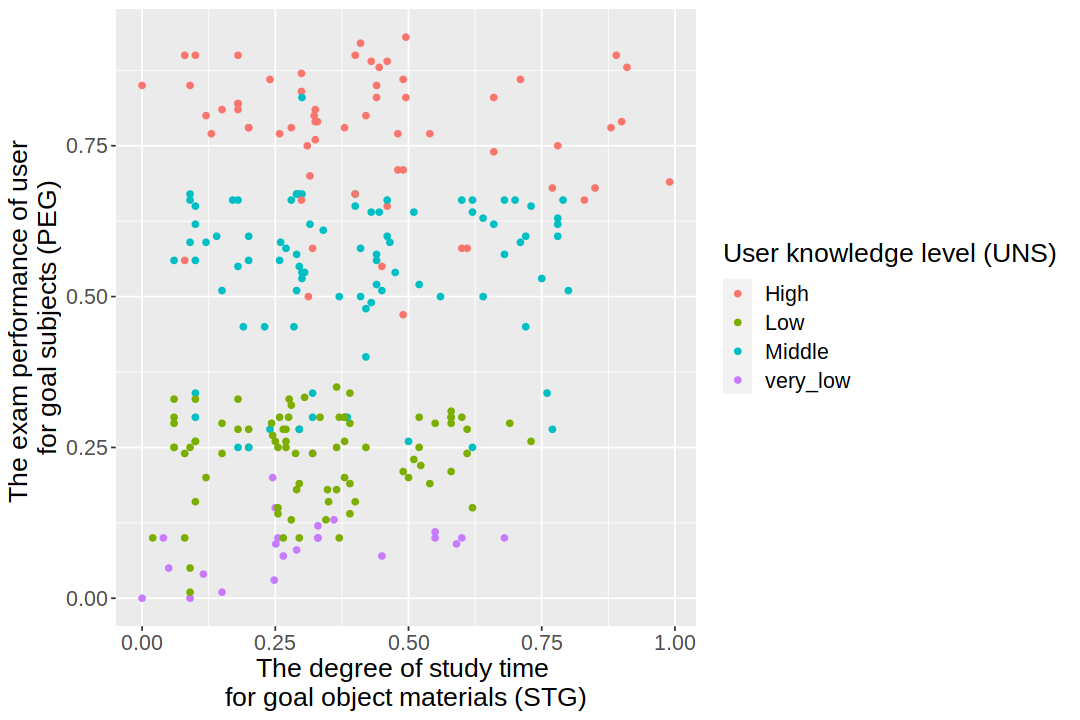

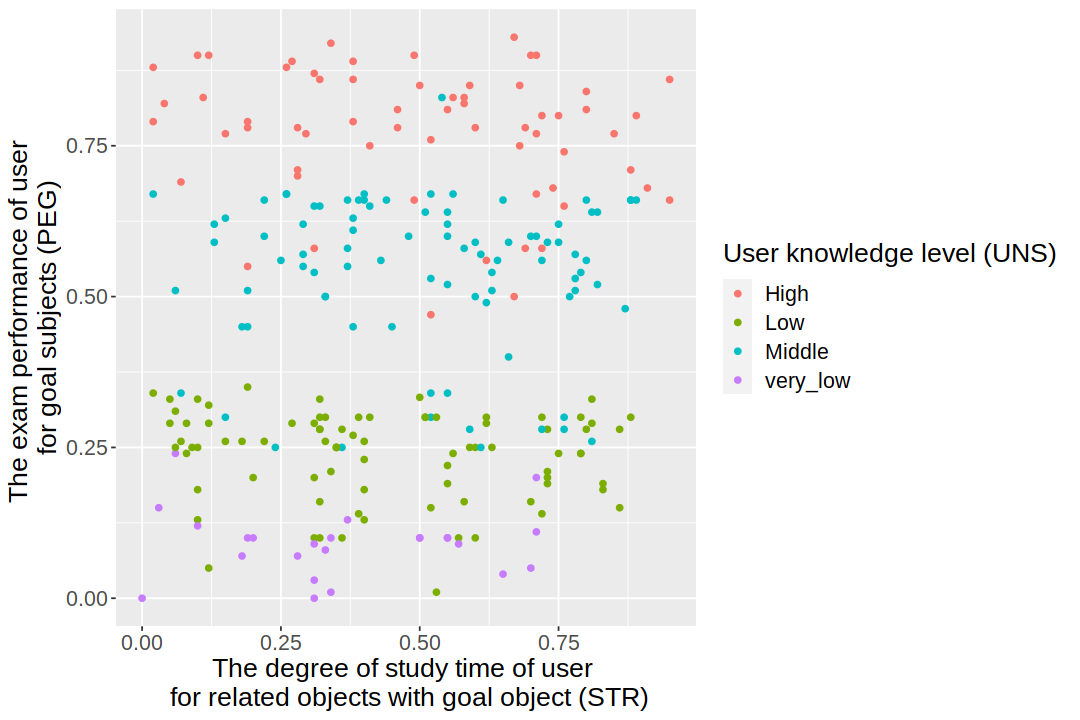

In [61]:

# plot a graph that 


options(repr.plot.width = 9, repr.plot.height = 6)
stg_str_plot <- select_training_data |>
    ggplot(aes(x = STG, 
               y = STR, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time \nfor goal subject materials (STG)",
             y = "The degree of study time of user \n for related objects with goal object (STR)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))
 
stg_peg_plot <- select_training_data |>
    ggplot(aes(x = STG, 
               y = PEG, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time \nfor goal object materials (STG)",
             y = "The exam performance of user \nfor goal subjects (PEG)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))
 
str_peg_plot <- select_training_data |>
    ggplot(aes(x = STR, 
               y = PEG, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time of user \n for related objects with goal object (STR)",
             y = "The exam performance of user \nfor goal subjects (PEG)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))

lpr_peg_plot <- select_training_data |>
    ggplot(aes(x = LPR, 
               y = PEG, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time of user \n for related objects with goal object (STR)",
             y = "The exam performance of user \nfor goal subjects (PEG)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))

stg_str_plot
stg_peg_plot
str_peg_plot
lpr_peg_plot